In [1]:
#FTEC4998

First Task:
1. Download a github desktop version, Learn what is a repository, what is pull and push
2. Install python
3. Choose IDE, VS code recommended
4. Install required library first
pip install numpy pandas yfinance tensorflow keras==2.6
5. Try to run all cell in "GitHub/FintechFYP/Sample1/Stock Prediction Using LSTM.ipynb"

In [2]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np

2023-11-01 20:39:56.905067: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/soka_1215/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
PROGRAM_PATH = os.getcwd()
FILE_PATH = "SPY.csv"
csv_path = os.path.join(PROGRAM_PATH, FILE_PATH)
print(csv_path)

/Users/soka_1215/Documents/GitHub/FintechFYP/LSTM_trial_1/SPY.csv


In [7]:
df = pd.read_csv(csv_path)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,127.760002,128.380005,127.430000,127.500000,102.458992,193697900
1,2012-01-04,127.199997,127.809998,126.709999,127.699997,102.619682,127186500
2,2012-01-05,127.010002,128.229996,126.430000,128.039993,102.892876,173895000
3,2012-01-06,128.199997,128.220001,127.290001,127.709999,102.627716,148050000
4,2012-01-09,128.000000,128.179993,127.410004,128.020004,102.876831,99530200
...,...,...,...,...,...,...,...
2971,2023-10-24,422.649994,424.820007,420.739990,423.630005,423.630005,78564200
2972,2023-10-25,421.890015,421.920013,417.019989,417.549988,417.549988,94223200
2973,2023-10-26,416.450012,417.329987,411.600006,412.549988,412.549988,115156800
2974,2023-10-27,414.190002,414.600006,409.209991,410.679993,410.679993,107228400


In [10]:
df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2012-01-03,2012-01-03,127.760002,128.380005,127.430000,127.500000,102.458992,193697900
2012-01-04,2012-01-04,127.199997,127.809998,126.709999,127.699997,102.619682,127186500
2012-01-05,2012-01-05,127.010002,128.229996,126.430000,128.039993,102.892876,173895000
2012-01-06,2012-01-06,128.199997,128.220001,127.290001,127.709999,102.627716,148050000
2012-01-09,2012-01-09,128.000000,128.179993,127.410004,128.020004,102.876831,99530200
...,...,...,...,...,...,...,...
2023-10-24,2023-10-24,422.649994,424.820007,420.739990,423.630005,423.630005,78564200
2023-10-25,2023-10-25,421.890015,421.920013,417.019989,417.549988,417.549988,94223200
2023-10-26,2023-10-26,416.450012,417.329987,411.600006,412.549988,412.549988,115156800


<AxesSubplot:xlabel='Date'>

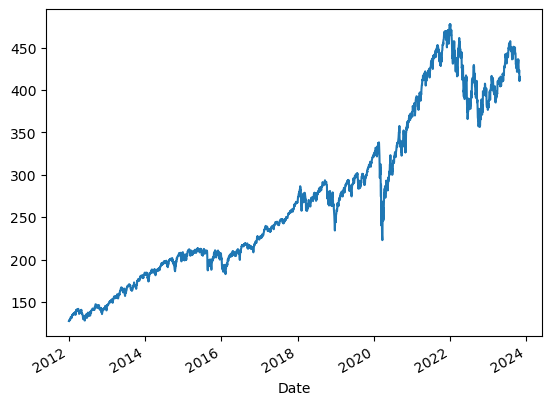

In [11]:
temp = df['Close']
temp.plot()

In [13]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)


In [14]:
WINDOW_SIZE = 20
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((2956, 20, 1), (2956,))

In [15]:
X

array([[[127.5     ],
        [127.699997],
        [128.039993],
        ...,
        [131.820007],
        [131.369995],
        [131.320007]],

       [[127.699997],
        [128.039993],
        [127.709999],
        ...,
        [131.369995],
        [131.320007],
        [132.470001]],

       [[128.039993],
        [127.709999],
        [128.020004],
        ...,
        [131.320007],
        [132.470001],
        [132.679993]],

       ...,

       [[428.519989],
        [427.480011],
        [427.309998],
        ...,
        [420.459991],
        [423.630005],
        [417.549988]],

       [[427.480011],
        [427.309998],
        [421.589996],
        ...,
        [423.630005],
        [417.549988],
        [412.549988]],

       [[427.309998],
        [421.589996],
        [424.660004],
        ...,
        [417.549988],
        [412.549988],
        [410.679993]]])

In [16]:
y

array([132.470001, 132.679993, 134.539993, ..., 412.549988, 410.679993,
       415.589996])

In [17]:
X_train, y_train = X[:2000], y[:2000]
X_val, y_val = X[2000:2500], y[2000:2500]
X_test, y_test = X[2500:], y[2500:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2000, 20, 1), (2000,), (500, 20, 1), (500,), (456, 20, 1), (456,))

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((20,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [22]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
56/63 [=========================>....] - ETA: 0s - loss: 49520.9492 - root_mean_squared_error: 222.5330INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


63/63 [==============================] - 7s 82ms/step - loss: 49199.9883 - root_mean_squared_error: 221.8107 - val_loss: 143898.8906 - val_root_mean_squared_error: 379.3401
Epoch 2/10
62/63 [============================>.] - ETA: 0s - loss: 48894.3086 - root_mean_squared_error: 221.1206INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


63/63 [==============================] - 4s 70ms/step - loss: 48893.7383 - root_mean_squared_error: 221.1193 - val_loss: 143341.8906 - val_root_mean_squared_error: 378.6052
Epoch 3/10
59/63 [===========================>..] - ETA: 0s - loss: 48676.4336 - root_mean_squared_error: 220.6274INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


63/63 [==============================] - 5s 73ms/step - loss: 48656.6953 - root_mean_squared_error: 220.5826 - val_loss: 142954.7812 - val_root_mean_squared_error: 378.0936
Epoch 4/10
61/63 [============================>.] - ETA: 0s - loss: 48495.4883 - root_mean_squared_error: 220.2169INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


63/63 [==============================] - 4s 64ms/step - loss: 48420.9336 - root_mean_squared_error: 220.0476 - val_loss: 142601.2188 - val_root_mean_squared_error: 377.6258
Epoch 5/10
62/63 [============================>.] - ETA: 0s - loss: 47873.3984 - root_mean_squared_error: 218.7999INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


63/63 [==============================] - 6s 91ms/step - loss: 47898.3828 - root_mean_squared_error: 218.8570 - val_loss: 141336.1250 - val_root_mean_squared_error: 375.9470
Epoch 6/10
62/63 [============================>.] - ETA: 0s - loss: 47265.5391 - root_mean_squared_error: 217.4064INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


63/63 [==============================] - 4s 71ms/step - loss: 47275.6836 - root_mean_squared_error: 217.4297 - val_loss: 140549.3438 - val_root_mean_squared_error: 374.8991
Epoch 7/10
62/63 [============================>.] - ETA: 0s - loss: 46165.6836 - root_mean_squared_error: 214.8620INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


63/63 [==============================] - 4s 68ms/step - loss: 46158.6211 - root_mean_squared_error: 214.8456 - val_loss: 138250.0938 - val_root_mean_squared_error: 371.8200
Epoch 8/10
63/63 [==============================] - ETA: 0s - loss: 45271.4375 - root_mean_squared_error: 212.7709INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


63/63 [==============================] - 5s 73ms/step - loss: 45271.4375 - root_mean_squared_error: 212.7709 - val_loss: 136735.0781 - val_root_mean_squared_error: 369.7771
Epoch 9/10
57/63 [==========================>...] - ETA: 0s - loss: 44541.4297 - root_mean_squared_error: 211.0484INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


63/63 [==============================] - 4s 66ms/step - loss: 44615.8359 - root_mean_squared_error: 211.2246 - val_loss: 135818.2500 - val_root_mean_squared_error: 368.5353
Epoch 10/10
57/63 [==========================>...] - ETA: 0s - loss: 44291.4219 - root_mean_squared_error: 210.4553INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


63/63 [==============================] - 4s 68ms/step - loss: 44091.7422 - root_mean_squared_error: 209.9803 - val_loss: 134855.7344 - val_root_mean_squared_error: 367.2271


In [23]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')


In [24]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data ={ 'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

63/63 [==============================] - 1s 4ms/step


,Train Predictions,Actuals
0,13.894748,132.470001
1,13.892118,132.679993
2,13.890059,134.539993
3,13.886124,134.449997
4,13.883851,134.789993
...,...,...
1995,13.149267,322.730011
1996,13.149405,324.450012
1997,13.148922,326.649994
1998,13.148239,325.709991


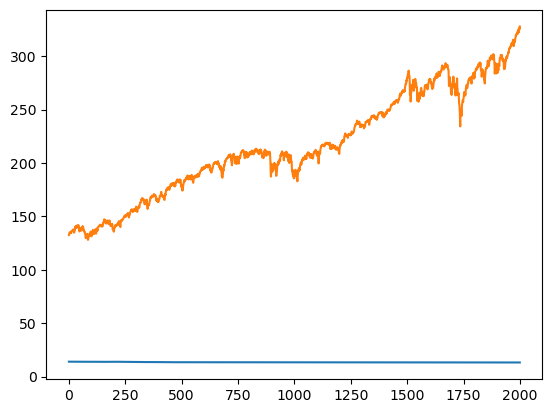

In [25]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])
